# Module 7: Exercise A

In this data project, we will focus on exploratory data analysis of obesity levels.

Let's first load all libraries or packages needed:

In [159]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

## Read the Data

>__Task 1__
>
>- Import the data file "obesity_level.csv"
>- Check metadata using `info()`

In [163]:
obs_df = pd.read_csv('obesity_level.csv')
obs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            2120 non-null   int64  
 1   month                           2120 non-null   int64  
 2   day                             2120 non-null   int64  
 3   gender                          2111 non-null   object 
 4   age                             2120 non-null   float64
 5   height                          2111 non-null   float64
 6   weight                          2111 non-null   float64
 7   family_history_with_overweight  2111 non-null   object 
 8   FAVC                            2111 non-null   object 
 9   FCVC                            2111 non-null   float64
 10  NCP                             2111 non-null   float64
 11  CAEC                            2111 non-null   object 
 12  SMOKE                           21

>__Task 2__
>
>Check the top 10 rows of the obesity data frame

In [166]:
obs_df.head(10)

,year,month,day,gender,age,height,weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2015,9,22,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,2015,10,19,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,2015,1,19,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,2015,11,17,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,2015,2,24,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,2015,5,4,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,2016,2,22,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,2016,8,14,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,2015,4,13,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,2016,5,20,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


Do you know which columns contain date information? The first three columns (i.e., __year__, __month__, __day__) are integers, shown as `int64` from the metadata above.

>__Task 3__
>
>- Combine and convert these three columns to `date` column, which contains `datetime` type
>- Confirm the result by printing its data type

In [170]:
obs_df['date'] = pd.to_datetime(obs_df[['year','month','day']])
# Call the column to see results
obs_df['date']

0      2015-09-22
1      2015-10-19
2      2015-01-19
3      2015-11-17
4      2015-02-24
          ...    
2115   2015-06-26
2116   2015-07-22
2117   2016-05-04
2118   2015-12-02
2119   2015-01-25
Name: date, Length: 2120, dtype: datetime64[ns]

In [172]:
# Print data type
obs_df['date'].dtype

dtype('<M8[ns]')

Now, let's look at the last column __NObeyesdad__, which has the obesity levels.

>__Task 4__
>
>Generate a list of unique values in __NObeyesdad__

In [176]:
obs_df['NObeyesdad'].drop_duplicates()

0             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
10           Obesity_Type_I
59      Insufficient_Weight
68          Obesity_Type_II
202        Obesity_Type_III
2111                    NaN
Name: NObeyesdad, dtype: object

## Data Cleansing

What is the timeframe of data collection? We can print its minimum and maximum values:

In [180]:
print(obs_df['date'].min(), obs_df['date'].max())

2015-01-01 00:00:00 2016-12-27 00:00:00


Now, we want to find out if there's any missing values in the data.

>__Task 5__
>
>- Find the number of missing values in each column
>- Retrieve rows with missing values

In [184]:
# Find the number of missing values in columns
obs_df.isnull().sum()

year                              0
month                             0
day                               0
gender                            9
age                               0
height                            9
weight                            9
family_history_with_overweight    9
FAVC                              9
FCVC                              9
NCP                               9
CAEC                              9
SMOKE                             9
CH2O                              9
SCC                               9
FAF                               9
TUE                               9
CALC                              9
MTRANS                            9
NObeyesdad                        9
date                              0
dtype: int64

In [186]:
# Retrieve missing values in rows
obs_df.isna()

,year,month,day,gender,age,height,weight,family_history_with_overweight,FAVC,FCVC,...,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,date
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,False,False,False,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2116,False,False,False,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2117,False,False,False,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2118,False,False,False,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False


Looks like some records only contain age data on file and have missing values in all the other essential columns.

>__Task 6__
>
>Handle missing values (What is your suggestion?)

In [190]:
# Solution
# In this case I would delete all of the missing values
new = obs_df.dropna().round(1) # rounded here 

In [192]:
# Retrieve missing values in rows again to double check the result
new.isna()

,year,month,day,gender,age,height,weight,family_history_with_overweight,FAVC,FCVC,...,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,date
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Also, we want to find out if there's any duplicated values. Note that this data set does not have an id column. So, we need to be cautious and infer duplicates by including ALL the values (not just a few columns).

>__Task 7__
>
>Check if there is any duplicates in the data set and identify if further action is needed

In [196]:
new.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Length: 2111, dtype: bool

## Data Analysis and Preprocessing

Let's explore the data more. Most of the columns in the data set describe the attributes of eating habits and physical conditions, i.e., __FAVC__, __FCVC__, __NCP__, __CAEC__, __SMOKE__, __CH2O__, __SCC__, __FAF__, __TUE__, __CALC__, __MTRANS__. We will dive into a few attributes.

>__Task 8__
>
>- Check the min, max, and average values of the __age__ column
>- Find out how many data points are in each gender group

In [201]:
# Check values
min = obs_df['age'].min()
max = obs_df['age'].max()
mean = obs_df['age'].mean().round(2)

print(min,max,mean)

14.0 94.0 24.43


In [203]:
# Count data points
obs_df['gender'].value_counts()

gender
Male      1068
Female    1043
Name: count, dtype: int64

>__Task 9__
>
>- Find out what are the values and the corresponding counts in the __NObeyesdad__ column. Is it a ordinal or nominal variable?
>- Convert it to a numerical data and name the column `NObesity_encoded`

In [206]:
# Count values
obs_df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [208]:
# Convert to numeric
NObesity_encoded = {
    'Obesity_Type_I': 1,
    'Obesity_Type_III': 2,
    'Obesity_Type_II': 3,
    'Overweight_Level_I': 4,
    'Overweight_Level_II': 5,
    'Normal_Weight': 6,
    'Insufficient_Weight': 0
}

obs_df['NObesity_encoded'] = obs_df['NObeyesdad'].map(NObesity_encoded)

>__Task 10__
>
>- Check the min and max values of __CH20__ (consumption of water daily)
>- Identify the rows with min and max values of the column

In [211]:
min_c = obs_df['CH2O'].min()
max_c = obs_df['CH2O'].max()

print(min,max)

14.0 94.0


In [213]:
# Identify the rows with min value
minR = obs_df[obs_df['CH2O'] == min_c]
minR

,year,month,day,gender,age,height,weight,family_history_with_overweight,FAVC,FCVC,...,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,date,NObesity_encoded
14,2016,1,25,Male,23.000000,1.770000,60.000000,yes,yes,3.000000,...,no,1.0,no,1.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight,2016-01-25,6.0
16,2015,5,5,Male,27.000000,1.930000,102.000000,yes,yes,2.000000,...,no,1.0,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,2015-05-05,5.0
18,2015,11,24,Female,30.000000,1.710000,82.000000,yes,yes,3.000000,...,yes,1.0,no,0.000000,0.000000,no,Automobile,Overweight_Level_II,2015-11-24,5.0
31,2015,8,7,Female,31.000000,1.580000,68.000000,yes,no,2.000000,...,no,1.0,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,2015-08-07,5.0
36,2015,1,23,Female,22.000000,1.560000,49.000000,no,yes,2.000000,...,no,1.0,yes,2.000000,0.000000,no,Walking,Normal_Weight,2015-01-23,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708,2016,2,16,Male,24.001196,1.603091,100.209405,yes,yes,3.000000,...,no,1.0,no,0.233056,1.707421,no,Public_Transportation,Obesity_Type_II,2016-02-16,3.0
1724,2015,4,13,Male,33.293166,1.696412,103.250355,yes,yes,2.679664,...,no,1.0,no,1.987296,0.000000,no,Public_Transportation,Obesity_Type_II,2015-04-13,3.0
1781,2016,9,6,Male,33.722449,1.712905,103.276087,yes,yes,2.525884,...,no,1.0,no,1.670360,0.023959,no,Public_Transportation,Obesity_Type_II,2016-09-06,3.0
1782,2016,1,3,Male,32.516469,1.695735,102.784864,yes,yes,2.736647,...,no,1.0,no,1.977918,0.056351,no,Public_Transportation,Obesity_Type_II,2016-01-03,3.0


In [215]:
# Identify the rows with max value
maxR = obs_df[obs_df['CH2O'] == max_c]
maxR

,year,month,day,gender,age,height,weight,family_history_with_overweight,FAVC,FCVC,...,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,date,NObesity_encoded
1,2015,10,19,Female,21.000000,1.520000,56.000000,yes,no,3.0,...,yes,3.0,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,2015-10-19,6.0
10,2016,4,20,Male,26.000000,1.850000,105.000000,yes,yes,3.0,...,no,3.0,no,2.000000,2.000000,Sometimes,Public_Transportation,Obesity_Type_I,2016-04-20,1.0
12,2015,8,8,Male,22.000000,1.650000,56.000000,no,no,3.0,...,no,3.0,no,2.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,2015-08-08,6.0
30,2016,4,14,Male,29.000000,1.770000,83.000000,no,yes,1.0,...,no,3.0,no,0.000000,1.000000,no,Motorbike,Overweight_Level_I,2016-04-14,4.0
32,2016,5,22,Female,24.000000,1.770000,76.000000,no,no,2.0,...,no,3.0,no,1.000000,1.000000,Sometimes,Walking,Normal_Weight,2016-05-22,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,2015,12,3,Male,18.880610,1.804160,104.406820,yes,yes,2.0,...,no,3.0,no,2.240500,0.000000,no,Public_Transportation,Obesity_Type_I,2015-12-03,1.0
1523,2015,9,9,Male,27.991467,1.825590,120.860386,yes,yes,3.0,...,no,3.0,no,0.691369,1.415536,Sometimes,Public_Transportation,Obesity_Type_II,2015-09-09,3.0
1546,2015,3,6,Male,25.298400,1.827279,120.996074,yes,yes,3.0,...,no,3.0,no,1.110215,0.396352,Sometimes,Public_Transportation,Obesity_Type_II,2015-03-06,3.0
1689,2016,4,5,Male,25.062942,1.828391,120.998266,yes,yes,3.0,...,no,3.0,no,1.685369,0.264969,Sometimes,Public_Transportation,Obesity_Type_II,2016-04-05,3.0


Now, let's find out which index had the highest average return.

>__Task 11__
>
>- Check the values of __CAEC__ (consumption of food between meals) and __CALC__ (consumption of alcohol). Do they have same categorical values?
>- Convert each of the two variables to numeric: `CAEC_encoded` and `CALC_encoded`. Pay attention to the ordinal or nominal type.

In [219]:
# Check the values of CAEC
obs_df['CAEC'].value_counts()

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [221]:
# Check the values of CALC 
obs_df['CALC'].value_counts()

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [223]:
# Convert to numeric
CAEC_encoded = {
    'Sometimes': 3,
    'Frequently': 2,
    'Always': 1,
    'no': 0   
}

CALC_encoded = {
    'Sometimes': 8,
    'Frequently': 7,
    'Always': 6,
    'no': 5   
}


In [225]:
# Check whether the encoding works
obs_df['CAEC_encoded'] = obs_df['CAEC'].map(CAEC_encoded)
obs_df['CALC_encoded'] = obs_df['CALC'].map(CALC_encoded)
obs_df

,year,month,day,gender,age,height,weight,family_history_with_overweight,FAVC,FCVC,...,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,date,NObesity_encoded,CAEC_encoded,CALC_encoded
0,2015,9,22,Female,21.0,1.62,64.0,yes,no,2.0,...,no,0.0,1.0,no,Public_Transportation,Normal_Weight,2015-09-22,6.0,3.0,5.0
1,2015,10,19,Female,21.0,1.52,56.0,yes,no,3.0,...,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,2015-10-19,6.0,3.0,8.0
2,2015,1,19,Male,23.0,1.80,77.0,yes,no,2.0,...,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,2015-01-19,6.0,3.0,7.0
3,2015,11,17,Male,27.0,1.80,87.0,no,no,3.0,...,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,2015-11-17,4.0,3.0,7.0
4,2015,2,24,Male,22.0,1.78,89.8,no,no,2.0,...,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,2015-02-24,5.0,3.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2015,6,26,NaN,33.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-26,NaN,NaN,NaN
2116,2015,7,22,NaN,56.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-22,NaN,NaN,NaN
2117,2016,5,4,NaN,32.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-04,NaN,NaN,NaN
2118,2015,12,2,NaN,94.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-02,NaN,NaN,NaN


>__Task 12__
>
>- Check the values of transportation used (__MTRANS__ column). Is it a ordinal or nominal variable?
>- Convert it to numeric using one-hot encoding and use the value as the new column names, e.g., `Automobile` and `Bike`. Hint: you can use either `get_dummies` from pandas or `OneHotEncoder` from sklearn. The latter will require some extra steps to merge back to the original dataset.

In [228]:
# Check the values
obs_df['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike', nan], dtype=object)

In [230]:
# I used dummies
new = pd.get_dummies(obs_df['MTRANS'], prefix='',prefix_sep='')
obs_df

,year,month,day,gender,age,height,weight,family_history_with_overweight,FAVC,FCVC,...,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,date,NObesity_encoded,CAEC_encoded,CALC_encoded
0,2015,9,22,Female,21.0,1.62,64.0,yes,no,2.0,...,no,0.0,1.0,no,Public_Transportation,Normal_Weight,2015-09-22,6.0,3.0,5.0
1,2015,10,19,Female,21.0,1.52,56.0,yes,no,3.0,...,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,2015-10-19,6.0,3.0,8.0
2,2015,1,19,Male,23.0,1.80,77.0,yes,no,2.0,...,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,2015-01-19,6.0,3.0,7.0
3,2015,11,17,Male,27.0,1.80,87.0,no,no,3.0,...,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,2015-11-17,4.0,3.0,7.0
4,2015,2,24,Male,22.0,1.78,89.8,no,no,2.0,...,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,2015-02-24,5.0,3.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2015,6,26,NaN,33.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-26,NaN,NaN,NaN
2116,2015,7,22,NaN,56.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-22,NaN,NaN,NaN
2117,2016,5,4,NaN,32.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-04,NaN,NaN,NaN
2118,2015,12,2,NaN,94.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-02,NaN,NaN,NaN


There are several binary variables in the dataset: __family_history_with_overweight__, __FAVC__ (frequency of consumption of vegetables), __SMOKE__, __SCC__ (calories consumption monitoring). Let's transform these variables.

>__Task 13__
>
>- Check the values of __family_history_with_overweight__, __FAVC__, __SMOKE__, __SCC__ 
>- Convert them to numeric with 1 for `yes` and 0 for `no`. The new columns are names with suffix `_encoded`, e.g., `family_history_with_overweight_encoded`.

In [234]:
# Check the values
print(obs_df['family_history_with_overweight'].value_counts())
print(obs_df['FAVC'].value_counts())
print(obs_df['SMOKE'].value_counts())
print(obs_df['SCC'].value_counts())

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64
FAVC
yes    1866
no      245
Name: count, dtype: int64
SMOKE
no     2067
yes      44
Name: count, dtype: int64
SCC
no     2015
yes      96
Name: count, dtype: int64


In [236]:
_encoded = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC'] # cols that need to be encoded 

# Conversion to encoded cols
for col in _encoded:
    obs_df[f'{col}_encoded'] = obs_df[col].map({'yes': 1, 'no': 0})

You can run the following `for` loop to check the results:

In [239]:
binary_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for col in binary_cols:
    print(obs_df[f"{col}_encoded"].value_counts())

family_history_with_overweight_encoded
1.0    1726
0.0     385
Name: count, dtype: int64
FAVC_encoded
1.0    1866
0.0     245
Name: count, dtype: int64
SMOKE_encoded
0.0    2067
1.0      44
Name: count, dtype: int64
SCC_encoded
0.0    2015
1.0      96
Name: count, dtype: int64


Next, we want to find if there's any return rate as outlier using the rule `mean+-3*sd`.

>__Task 14__
>
>Retrieve rows where values are outliers in the __weight__ column
>
>- Find the the upper bound, mean, and lower bound of the column
>- Create a mask for values less than `mean-3*sd` and greater than `mean+3*sd`
>- Use the mask to filter the rows

In [243]:
# Find the upper bound, mean, and lower bound
mean = obs_df['weight'].mean()
sd = obs_df['weight'].std()

In [245]:
# Create a mask and filter the rows
mask = (obs_df['weight'] < mean-3*sd) | (obs_df['weight'] > mean+3*sd)
obs_df[mask]

,year,month,day,gender,age,height,weight,family_history_with_overweight,FAVC,FCVC,...,MTRANS,NObeyesdad,date,NObesity_encoded,CAEC_encoded,CALC_encoded,family_history_with_overweight_encoded,FAVC_encoded,SMOKE_encoded,SCC_encoded
344,2016,1,5,Male,18.0,1.87,173.0,yes,yes,3.0,...,Public_Transportation,Obesity_Type_III,2016-01-05,2.0,2.0,8.0,1.0,1.0,0.0,0.0


You can use the same method to find out outliers in the other columns. But there's a easier way to find out all in once using the `for` loop:

In [248]:
for col in ['height', 'weight', 'FAF']:
    upper_bound = obs_df[col].mean()+3*obs_df[col].std()
    lower_bound = obs_df[col].mean()-3*obs_df[col].std()
    outliers_mask = (obs_df[col] < lower_bound) | (obs_df[col] > upper_bound)
    print(outliers_mask.sum()) 
    print(obs_df[outliers_mask][col])

0
Series([], Name: height, dtype: float64)
1
344    173.0
Name: weight, dtype: float64
0
Series([], Name: FAF, dtype: float64)


As we are looking into obesity level, it is expected to see some outliers in terms of weight or other indicators, unless the number exceeds the possibility of the human body weight.

In [251]:
obs_df.columns

Index(['year', 'month', 'day', 'gender', 'age', 'height', 'weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad',
       'date', 'NObesity_encoded', 'CAEC_encoded', 'CALC_encoded',
       'family_history_with_overweight_encoded', 'FAVC_encoded',
       'SMOKE_encoded', 'SCC_encoded'],
      dtype='object')

>__Task 15__
>
>Split the data set into 80% train set and 20% test set
>
>- The target variable is __NObesity_encoded__
>- The feature columns are __age__, __height__, __weight__, __FCVC__, __NCP__, __CH2O__, __CAEC_encoded__, __CALC_encoded__, __Automobile__, __Bike__, __Motorbike__, __Public_Transportation__, __Walking__, __family_history_with_overweight_encoded__, __FAVC_encoded__, __SMOKE_encoded__, __SCC_encoded__
>
>Remember our target variable has multiple categories? Do you need to consider stratified splitting?

In [254]:
# Define the feature columns and target variable
features = ["age", "height", "weight", "FCVC", "NCP", "CH2O", "CAEC_encoded", 
            "CALC_encoded","family_history_with_overweight_encoded", 
            "FAVC_encoded", "SMOKE_encoded", "SCC_encoded"]
# I could not figure out how to make Automobile, Bike, Motorbike, Public_Transportation, Walking work; I would apperciate your feeback on why. 

target = "NObesity_encoded"

# Split the data into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(obs_df[features], obs_df[target], test_size=0.2)

In [256]:
# Check the target var distribution in train set vs test set

#training set
train_distribution = y_train.value_counts(normalize=True)
print("Training:\n", train_distribution)

#testing set
test_distribution = y_test.value_counts(normalize=True)
print("\nTest:\n", test_distribution)

Training:
 NObesity_encoded
1.0    0.162722
2.0    0.160947
3.0    0.140828
4.0    0.140237
5.0    0.135503
6.0    0.134320
0.0    0.125444
Name: proportion, dtype: float64

Test:
 NObesity_encoded
1.0    0.180523
5.0    0.144893
6.0    0.142518
0.0    0.142518
3.0    0.140143
4.0    0.125891
2.0    0.123515
Name: proportion, dtype: float64


>__Task 16__
>
>- Apply `MinMaxScaler` to scale columns __age__, __height__, __weight__, __FCVC__, __NCP__, __CH2O__ between 0 and 1. Do you need to scale the encoded categorical variables?
>- Implement the scaler to both train and test sets from the above task. Hint: you can assign the scaled value to `X_train[cols]` and `X_test[cols]`.

In [259]:
X_train.head()

,age,height,weight,FCVC,NCP,CH2O,CAEC_encoded,CALC_encoded,family_history_with_overweight_encoded,FAVC_encoded,SMOKE_encoded,SCC_encoded
2016,25.940153,1.596813,102.320437,3.0,3.0,1.000536,3.0,8.0,1.0,1.0,0.0,0.0
2066,21.568951,1.699315,133.107610,3.0,3.0,1.733306,3.0,8.0,1.0,1.0,0.0,0.0
93,20.000000,1.600000,57.000000,3.0,3.0,2.000000,1.0,5.0,0.0,0.0,0.0,0.0
659,21.000000,1.520000,42.000000,3.0,1.0,1.000000,2.0,8.0,0.0,1.0,0.0,0.0
1998,21.291969,1.800200,155.242672,3.0,3.0,2.351193,3.0,8.0,1.0,1.0,0.0,0.0


In [261]:
# Note that the scaler will need to fit to train set
min_max = MinMaxScaler()  

In [263]:
# Transform both train and test sets
cols = ["age", "height", "weight", "FCVC", "NCP", "CH2O"]

X_train[cols] = min_max.fit_transform(X_train[cols])
X_test[cols] = min_max.transform(X_test[cols])

In [265]:
X_test.head()

,age,height,weight,FCVC,NCP,CH2O,CAEC_encoded,CALC_encoded,family_history_with_overweight_encoded,FAVC_encoded,SMOKE_encoded,SCC_encoded
328,0.050633,0.547170,0.261194,1.0,0.000000,1.000000,3.0,8.0,1.0,0.0,0.0,0.0
1951,0.049418,0.553942,0.703592,1.0,0.666667,0.842410,3.0,8.0,1.0,1.0,0.0,0.0
1662,0.102324,0.751987,0.615083,1.0,0.522522,0.505511,3.0,8.0,1.0,1.0,0.0,0.0
409,0.227848,0.188679,0.119403,1.0,0.000000,1.000000,3.0,8.0,1.0,1.0,0.0,0.0
2037,0.139241,0.300698,0.495577,1.0,0.666667,0.804526,3.0,8.0,1.0,1.0,0.0,0.0


## Visualization

Let's first use pandas default histogram method to plot distributions.

>__Task 17__
>
>Plot distributions for __FCVC__ (frequency of consumption of vegetables) and __FAF__ (physical activity frequency), setting transparency to 50%

<Axes: ylabel='Frequency'>

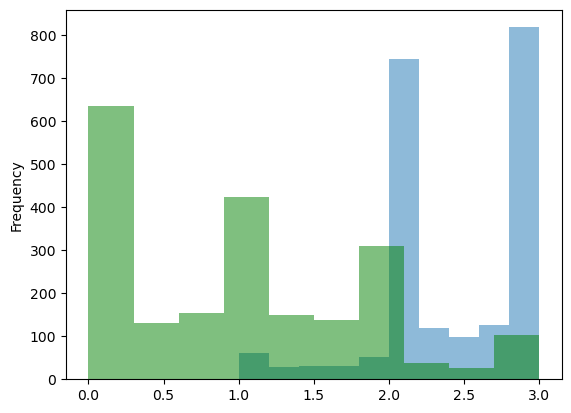

In [270]:
# Write two code lines in one cell
obs_df['FCVC'].plot(kind='hist',alpha=0.5)
obs_df['FAF'].plot(kind='hist',alpha=0.5,color='green')

>__Task 18__
>
>Create a box plot to show distributions and outliers of __age__, __height__, __weight__, __FCVC__, __NCP__ from `X_train`

<Axes: >

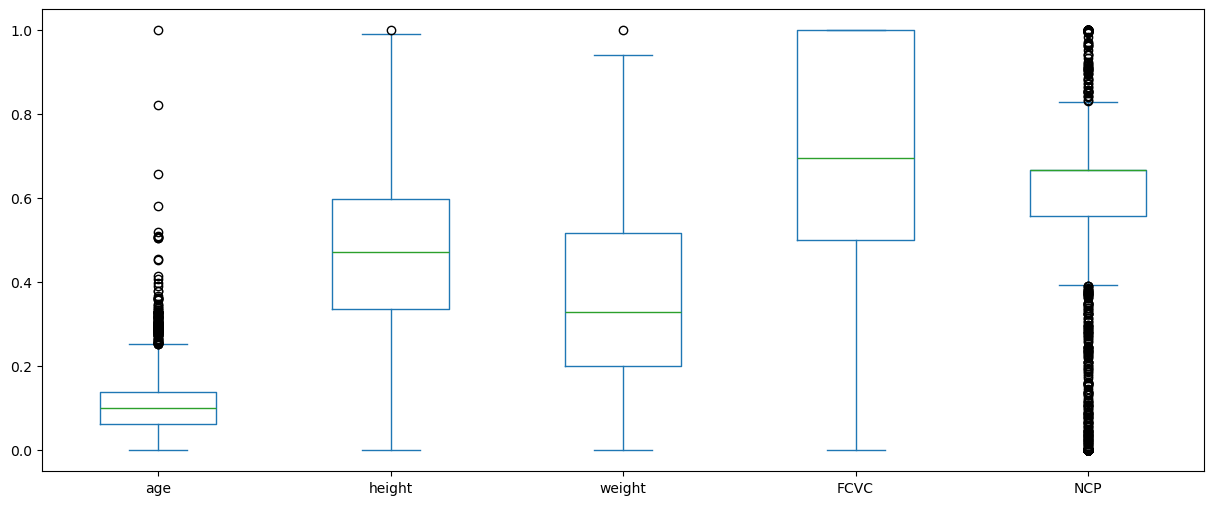

In [273]:
f = ['age', 'height', 'weight', 'FCVC', 'NCP']
X_train[f].plot(kind='box',figsize=(15, 6))

Then, we use seaborn pairplot method to compare different attribute. Do you think any features are highly related?  

>__Task 19__
>
>Create a pairplot using seaborn to compare these features: __age__, __height__, __weight__, __FCVC__, __NCP__, __CH2O__, __CAEC_encoded__, __CALC_encoded__

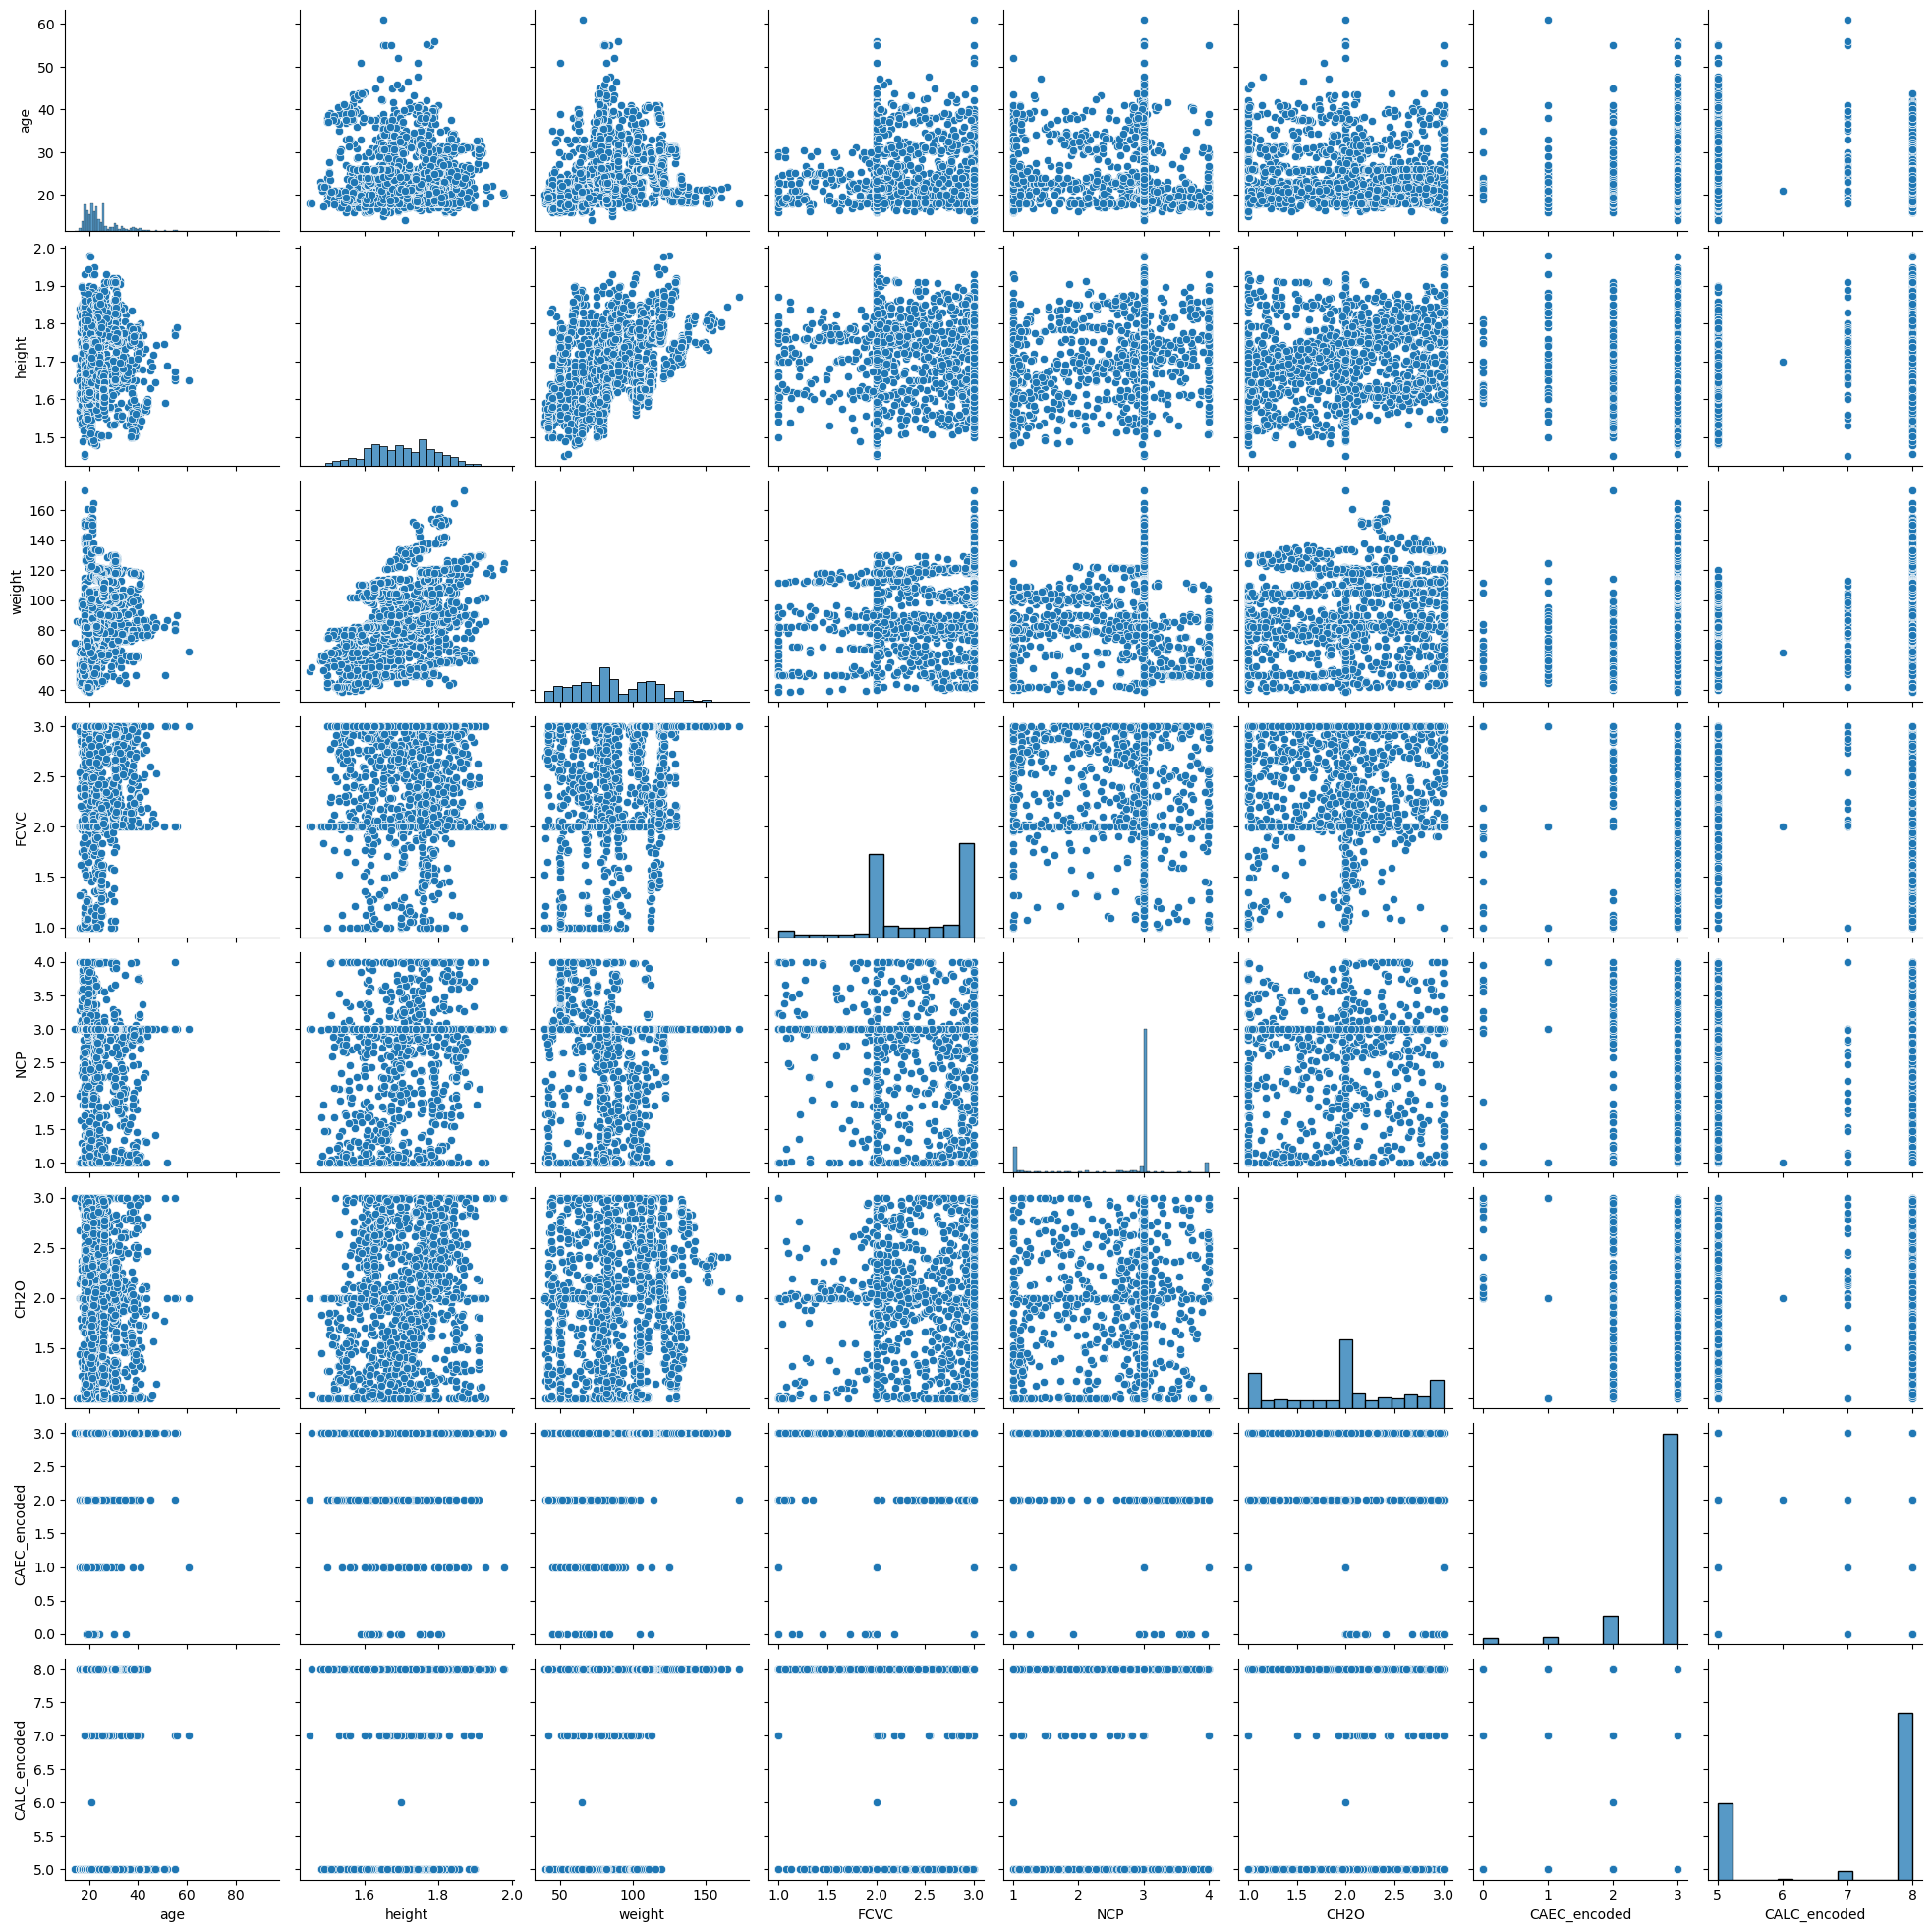

In [136]:
sns.pairplot(data=obs_df,vars=['age', 'height', 'weight', 'FCVC', 'NCP', 'CH2O', 'CAEC_encoded', 'CALC_encoded'])

There are not obvious correlations between the features. Let's see whether any of the features has visible correlation with the target variable.

>__Task 20__
>
>Using pandas built-in function, create a single scatter plot to show the join distribution of __NObesity_encoded__ and __NCP__ (number of main meals)

<Axes: xlabel='NObesity_encoded', ylabel='NCP'>

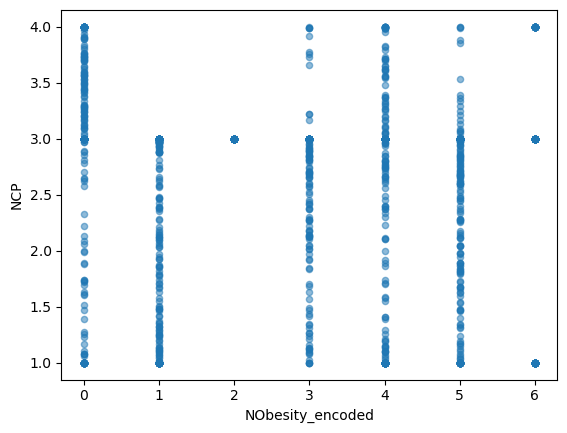

In [142]:
obs_df.plot(kind='scatter',x='NObesity_encoded',y='NCP',alpha=0.5)

>__Task 21__
>
>Create a 2×2 figure using the `subplots()` function
>
>- Plot scatter plot of the target variable __NObesity_encoded__ and four features: __age__, __height__, __weight__, __family_history_with_overweight_encoded__
>- Set figure size to `(10,10)`
>- Share x axis 
>- Add y-axis labels as the feature names
>- Add title as `Scatter Plot of Age, Height, Weight, Family History with Obesity Level`
>- Save figure as `obesity_level_scatter_plot.png` with dpi of 400

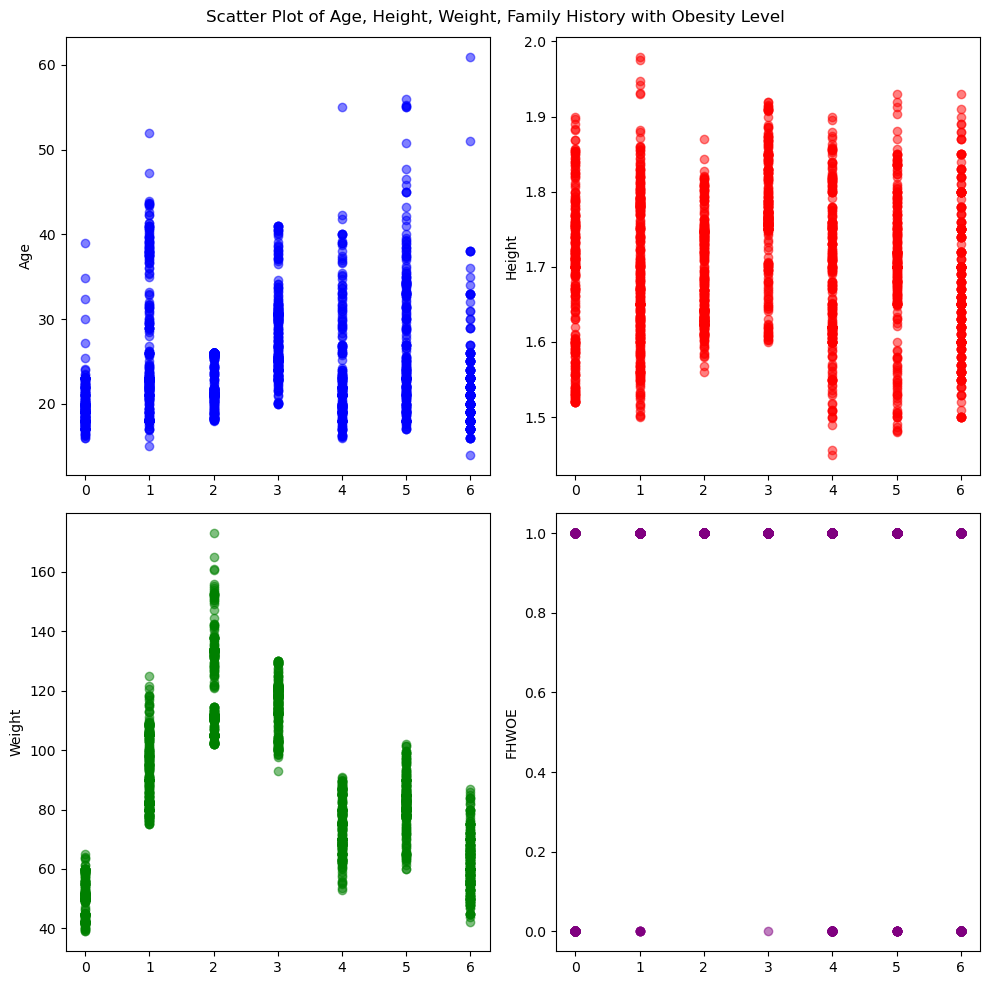

In [295]:
fig, axs = plt.subplots(2,2,figsize=(10,10))

# age
axs[0,0].scatter(obs_df['NObesity_encoded'],obs_df['age'], alpha=0.5, color='blue')
axs[0,0].set_ylabel('Age')

#height
axs[0,1].scatter(obs_df['NObesity_encoded'],obs_df['height'], alpha=0.5, color='red')
axs[0,1].set_ylabel('Height')

# weight
axs[1,0].scatter(obs_df['NObesity_encoded'],obs_df['weight'], alpha=0.5, color='green')
axs[1,0].set_ylabel('Weight')

#family history
axs[1,1].scatter(obs_df['NObesity_encoded'],obs_df['family_history_with_overweight_encoded'], alpha=0.5, color='purple')
axs[1,1].set_ylabel('FHWOE')

plt.suptitle('Scatter Plot of Age, Height, Weight, Family History with Obesity Level')
plt.savefig('obesity_level_scatter_plot.png', dpi=400)

plt.tight_layout()